<a href="https://www.kaggle.com/code/seunayegboyin/purchase-prediction-with-logistic-regression?scriptVersionId=124534906" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

sns.set()

In [2]:
purch=pd.read_csv('../input/purchase/purchase data.csv')
purch.sample(6)

,ID,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,...,Promotion_3,Promotion_4,Promotion_5,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
28885,200000248,564,0,0,0,0,0,1.33,1.55,2.07,...,0,0,0,1,1,32,1,124975,1,0
20506,200000179,545,1,5,3,0,0,1.46,1.56,2.05,...,0,0,0,0,0,34,1,123243,1,1
46198,200000397,440,0,0,0,0,0,1.47,1.89,2.02,...,0,0,0,1,1,24,1,78762,0,0
47947,200000411,681,1,4,4,4,1,1.42,1.85,2.06,...,0,0,0,1,0,57,2,113334,1,1
51629,200000443,38,0,0,0,0,0,1.50,1.90,1.99,...,0,0,0,0,0,65,2,129838,1,1
9259,200000082,161,0,0,0,0,0,1.39,1.90,1.94,...,0,0,0,0,0,48,1,124156,1,1


In [3]:
purch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58693 entries, 0 to 58692
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 58693 non-null  int64  
 1   Day                58693 non-null  int64  
 2   Incidence          58693 non-null  int64  
 3   Brand              58693 non-null  int64  
 4   Quantity           58693 non-null  int64  
 5   Last_Inc_Brand     58693 non-null  int64  
 6   Last_Inc_Quantity  58693 non-null  int64  
 7   Price_1            58693 non-null  float64
 8   Price_2            58693 non-null  float64
 9   Price_3            58693 non-null  float64
 10  Price_4            58693 non-null  float64
 11  Price_5            58693 non-null  float64
 12  Promotion_1        58693 non-null  int64  
 13  Promotion_2        58693 non-null  int64  
 14  Promotion_3        58693 non-null  int64  
 15  Promotion_4        58693 non-null  int64  
 16  Promotion_5        586

In [4]:
purch.columns

Index(['ID', 'Day', 'Incidence', 'Brand', 'Quantity', 'Last_Inc_Brand',
       'Last_Inc_Quantity', 'Price_1', 'Price_2', 'Price_3', 'Price_4',
       'Price_5', 'Promotion_1', 'Promotion_2', 'Promotion_3', 'Promotion_4',
       'Promotion_5', 'Sex', 'Marital status', 'Age', 'Education', 'Income',
       'Occupation', 'Settlement size'],
      dtype='object')

In [5]:
purch1=purch[['ID','Incidence', 'Brand', 'Quantity','Sex', 'Marital status', 'Age', 'Education', 'Income',
       'Occupation', 'Settlement size']]
purch1.set_index("ID", inplace=True)
purch1

,Incidence,Brand,Quantity,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
ID,,,,,,,,,,
200000001,0,0,0,0,0,47,1,110866,1,0
200000001,0,0,0,0,0,47,1,110866,1,0
200000001,0,0,0,0,0,47,1,110866,1,0
200000001,0,0,0,0,0,47,1,110866,1,0
200000001,0,0,0,0,0,47,1,110866,1,0
...,...,...,...,...,...,...,...,...,...,...
200000500,0,0,0,0,0,42,1,120946,1,0
200000500,0,0,0,0,0,42,1,120946,1,0
200000500,0,0,0,0,0,42,1,120946,1,0


In [6]:
purch1.corr().round(2)

,Incidence,Brand,Quantity,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
Incidence,1.00,0.90,0.80,-0.03,-0.01,0.07,0.04,0.07,0.06,0.10
Brand,0.90,1.00,0.67,-0.07,-0.02,0.12,0.07,0.13,0.13,0.20
Quantity,0.80,0.67,1.00,-0.00,0.01,0.06,0.05,0.06,0.04,0.07
Sex,-0.03,-0.07,-0.00,1.00,0.46,-0.12,0.20,-0.09,-0.08,-0.21
Marital status,-0.01,-0.02,0.01,0.46,1.00,-0.12,0.40,0.09,0.10,0.05
Age,0.07,0.12,0.06,-0.12,-0.12,1.00,0.68,0.38,0.18,0.20
Education,0.04,0.07,0.05,0.20,0.40,0.68,1.00,0.36,0.20,0.22
Income,0.07,0.13,0.06,-0.09,0.09,0.38,0.36,1.00,0.71,0.49
Occupation,0.06,0.13,0.04,-0.08,0.10,0.18,0.20,0.71,1.00,0.57
Settlement size,0.10,0.20,0.07,-0.21,0.05,0.20,0.22,0.49,0.57,1.00


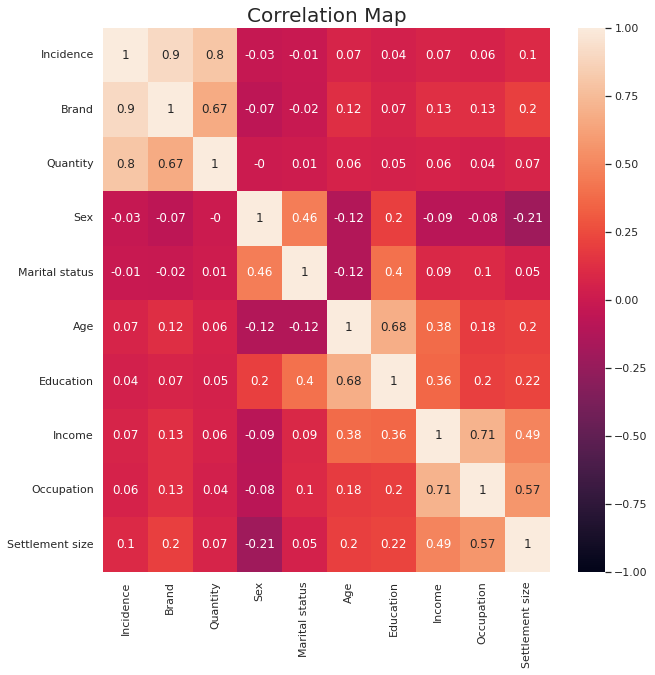

In [7]:
plt.figure(figsize=(10,10))
sns.heatmap(purch1.corr().round(2),vmin=-1,vmax=1,annot=True)
plt.title("Correlation Map",fontsize=20)
plt.show()

In [8]:
stand=StandardScaler()
stand=stand.fit_transform(purch1)
stand

array([[-0.57642561, -0.51700711, -0.46170926, ..., -0.27004743,
         0.34045209, -0.8259147 ],
       [-0.57642561, -0.51700711, -0.46170926, ..., -0.27004743,
         0.34045209, -0.8259147 ],
       [-0.57642561, -0.51700711, -0.46170926, ..., -0.27004743,
         0.34045209, -0.8259147 ],
       ...,
       [-0.57642561, -0.51700711, -0.46170926, ..., -0.02203665,
         0.34045209, -0.8259147 ],
       [ 1.73482923,  0.70768054,  1.53999717, ..., -0.02203665,
         0.34045209, -0.8259147 ],
       [-0.57642561, -0.51700711, -0.46170926, ..., -0.02203665,
         0.34045209, -0.8259147 ]])

In [9]:
pca=PCA()
pca.fit(stand) 
pca.explained_variance_ratio_.cumsum()

array([0.29527391, 0.52524657, 0.69164024, 0.81394121, 0.87373796,
       0.91957729, 0.95206863, 0.97713313, 0.99258847, 1.        ])

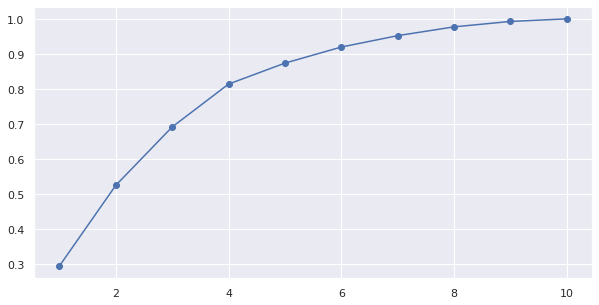

In [10]:
plt.figure(figsize=(10,5))
plt.plot(range(1,11),pca.explained_variance_ratio_.cumsum(),marker='o')
plt.show()

In [11]:
pca=PCA(n_components=4)
pca.fit(stand) 
pca.components_

array([[ 0.39492831,  0.41526548,  0.35084307, -0.06242508,  0.06570378,
         0.28886518,  0.28187646,  0.37625175,  0.34535618,  0.34139095],
       [ 0.45469146,  0.39198904,  0.4212854 , -0.03277863, -0.15012272,
        -0.24857648, -0.31352045, -0.34809377, -0.31333689, -0.24304934],
       [ 0.06990097,  0.02188626,  0.09762838,  0.62358346,  0.59709381,
         0.01068499,  0.38074648, -0.12226462, -0.17006547, -0.22532919],
       [-0.00282517, -0.00919482, -0.0066311 , -0.19056693, -0.31832406,
         0.66353539,  0.40592411, -0.15846383, -0.39740797, -0.27225001]])

In [12]:
pca_comp=pd.DataFrame(pca.components_,columns=['Incidence', 'Brand', 'Quantity', 'Sex', 'Marital status', 'Age', 'Education', 'Income',
       'Occupation', 'Settlement size'],index=['comp 1','comp 2','comp 3','comp 4'])
pca_comp.round(2)

,Incidence,Brand,Quantity,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
comp 1,0.39,0.42,0.35,-0.06,0.07,0.29,0.28,0.38,0.35,0.34
comp 2,0.45,0.39,0.42,-0.03,-0.15,-0.25,-0.31,-0.35,-0.31,-0.24
comp 3,0.07,0.02,0.10,0.62,0.60,0.01,0.38,-0.12,-0.17,-0.23
comp 4,-0.00,-0.01,-0.01,-0.19,-0.32,0.66,0.41,-0.16,-0.40,-0.27


Text(0.5, 1.0, 'Component Map')

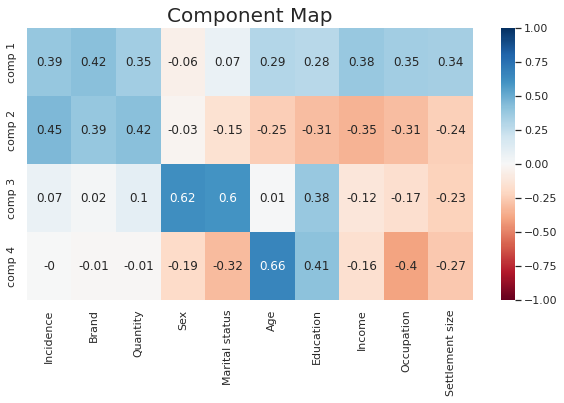

In [13]:
plt.figure(figsize=(10,5))
sns.heatmap(pca_comp.round(2),vmin=-1,vmax=1, cmap='RdBu',annot=True)
plt.title("Component Map",fontsize=20)

In [14]:
pca_tr=pca.transform(stand)

# **K-Means clustering with PCA**

In [15]:
wcss=[]
for i in range(1,11):
    kmeans_pca=KMeans(n_clusters=i,random_state=40)
    kmeans_pca.fit(pca_tr)
    wcss.append(kmeans_pca.inertia_)

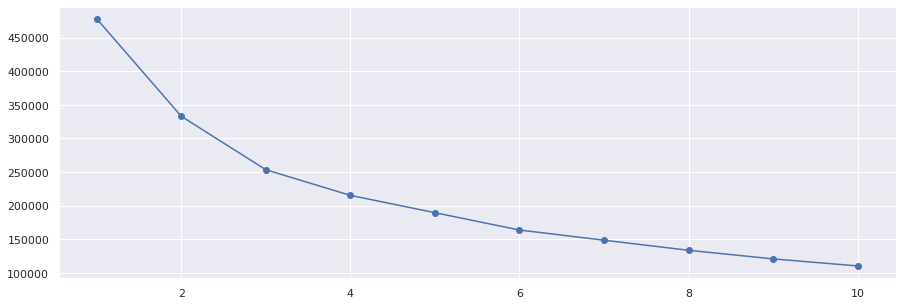

In [16]:
plt.figure(figsize=(15,5))
plt.plot(range(1,11),wcss,marker='o')
plt.show()

In [17]:
kmeans_pca=KMeans(n_clusters=4,random_state=40)
kmeans_pca.fit(pca_tr)
kmeans_pca.labels_

array([2, 2, 2, ..., 2, 3, 2], dtype=int32)

In [18]:
purch['segment']=kmeans_pca.labels_
purch.reset_index(inplace=True)
purch

,index,ID,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,...,Promotion_4,Promotion_5,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,segment
0,0,200000001,1,0,0,0,0,0,1.59,1.87,...,0,0,0,0,47,1,110866,1,0,2
1,1,200000001,11,0,0,0,0,0,1.51,1.89,...,0,0,0,0,47,1,110866,1,0,2
2,2,200000001,12,0,0,0,0,0,1.51,1.89,...,0,0,0,0,47,1,110866,1,0,2
3,3,200000001,16,0,0,0,0,0,1.52,1.89,...,0,0,0,0,47,1,110866,1,0,2
4,4,200000001,18,0,0,0,0,0,1.52,1.89,...,0,0,0,0,47,1,110866,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58688,58688,200000500,703,0,0,0,2,1,1.41,1.85,...,0,0,0,0,42,1,120946,1,0,2
58689,58689,200000500,710,0,0,0,0,0,1.36,1.84,...,0,0,0,0,42,1,120946,1,0,2
58690,58690,200000500,717,0,0,0,0,0,1.50,1.80,...,0,0,0,0,42,1,120946,1,0,2
58691,58691,200000500,722,1,2,3,0,0,1.51,1.82,...,0,0,0,0,42,1,120946,1,0,3


In [19]:
purch[['ID',"segment"]].groupby('ID').mean().round()

,segment
ID,
200000001,2.0
200000002,1.0
200000003,2.0
200000004,2.0
200000005,1.0
...,...
200000496,0.0
200000497,2.0
200000498,1.0


In [20]:
purch_analy=purch[['ID','Incidence']].groupby('ID').count().rename(columns={"Incidence":"Number of visit"})
purch_incidence=purch[purch["Incidence"]==1].groupby("ID").sum()
purch_analy["Number of Purchase"]=purch_incidence["Incidence"]
purch_analy["Average Purchase"]=(purch_analy["Number of Purchase"]/purch_analy["Number of visit"]).round(3)
purch_analy.head().sort_values(['Number of visit','Number of Purchase','Average Purchase'])
purch_seg=purch[['ID',"segment"]].groupby('ID').mean().round()
purch_analy['segment']=purch_seg['segment']
purch_analy

,Number of visit,Number of Purchase,Average Purchase,segment
ID,,,,
200000001,101,9,0.089,2.0
200000002,87,11,0.126,1.0
200000003,97,10,0.103,2.0
200000004,85,11,0.129,2.0
200000005,111,13,0.117,1.0
...,...,...,...,...
200000496,120,20,0.167,0.0
200000497,120,43,0.358,2.0
200000498,131,39,0.298,1.0


In [21]:
purch_seg_analysis=purch[['Incidence','segment']].groupby('segment').count()
purch_seg_analysis['segmentation proportions']=(purch[['Incidence','segment']].groupby('segment').count()/len(purch)).round(3)
purch_seg_analysis.rename(index=({0:'Fewer-Oppurtunitie',
                          1:'Well-Off',
                          2:'Career-Focused',
                          3:'Standard'}),inplace=True)
purch_seg_analysis

,Incidence,segmentation proportions
segment,,
Fewer-Oppurtunitie,14095,0.240
Well-Off,12084,0.206
Career-Focused,18231,0.311
Standard,14283,0.243


In [22]:
purch_seg_analysis['segmentation proportions']

segment
Fewer-Oppurtunitie    0.240
Well-Off              0.206
Career-Focused        0.311
Standard              0.243
Name: segmentation proportions, dtype: float64

([<matplotlib.patches.Wedge at 0x754d4a375310>,
 [Text(0.8018655028537539, 0.7530018030078657, 'Fewer-Oppurtunitie'),
  Text(-0.6068104274540275, 0.9174862969729088, 'Well-Off'),
  Text(-0.8837855828008365, -0.6549221660879908, 'Career-Focused'),
  Text(0.794733034224196, -0.760525742044806, 'Standard')],
 [Text(0.43738118337477483, 0.4107282561861085, '24.0%'),
  Text(-0.330987505884015, 0.5004470710761321, '20.6%'),
  Text(-0.48206486334591075, -0.35723027241163136, '31.1%'),
  Text(0.43349074594047055, -0.4148322229335305, '24.3%')])

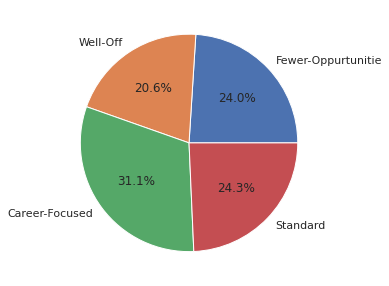

In [23]:
plt.figure(figsize=(5,5))
plt.pie(purch_seg_analysis['segmentation proportions'],autopct="%1.1f%%",labels=['Fewer-Oppurtunitie','Well-Off','Career-Focused','Standard'])

In [24]:
purch_seg=purch[purch['Incidence']==1] # customer that purchase on every purchase occassion
purch_seg=purch[['segment','Incidence']].groupby('segment').sum().rename(columns=({'Incidence':'Number of purchase'}))
purch_seg['Number of visits']=purch[['segment','Incidence']].groupby('segment').count()
purch_seg['Average purchase']=(purch_seg['Number of purchase']/purch_seg['Number of visits']).round(3)
purch_seg

,Number of purchase,Number of visits,Average purchase
segment,,,
0,88,14095,0.006
1,97,12084,0.008
2,170,18231,0.009
3,14283,14283,1.000


In [25]:
purch_seg=purch[purch['Incidence']==1]# customer that purchase on every purchase occassion
purch_seg=purch[['segment','Incidence']].groupby('segment').sum().rename(columns=({'Incidence':'Number of purchase'}))
purch_seg['Number of visits']=purch[['segment','Incidence']].groupby('segment').count()
purch_seg

,Number of purchase,Number of visits
segment,,
0,88,14095
1,97,12084
2,170,18231
3,14283,14283


In [26]:
purch_analy_mean=purch_analy.groupby('segment').mean()
purch_analy_mean.rename(index=({0:'Fewer-Oppurtunitie',
                          1:'Well-Off',
                          3:'Career-Focused',
                          2:'Standard'}),inplace=True)
purch_analy_mean

,Number of visit,Number of Purchase,Average Purchase
segment,,,
Fewer-Oppurtunitie,118.450704,14.169014,0.119620
Well-Off,115.462025,25.265823,0.220120
Standard,115.372624,31.186312,0.263631
Career-Focused,212.125000,179.750000,0.801875


In [27]:
purch_analy_std=purch_analy.groupby('segment').std()
purch_analy_std.rename(index=({0:'Fewer-Oppurtunitie',
                          1:'Well-Off',
                          3:'Career-Focused',
                          2:'Standard'}),inplace=True)
purch_analy_std

,Number of visit,Number of Purchase,Average Purchase
segment,,,
Fewer-Oppurtunitie,15.754173,4.322651,0.032470
Well-Off,19.469603,11.955021,0.094452
Standard,20.145225,23.448162,0.163748
Career-Focused,118.605514,120.049692,0.102142


Text(0.5, 1.0, 'Average Number of store visits by segment')

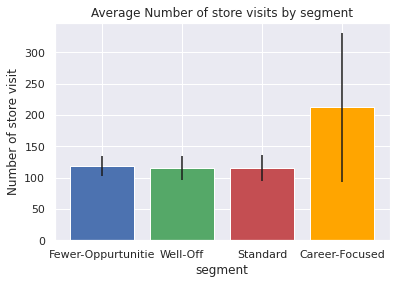

In [28]:
plt.bar(x=purch_analy_mean.index,
           height=purch_analy_mean['Number of visit'],
           yerr=purch_analy_std['Number of visit'],
        color=('b','g','r','orange')
       )
plt.xlabel('segment')
plt.ylabel('Number of store visit')
plt.title('Average Number of store visits by segment')

Text(0.5, 1.0, 'Average Number of store purchase by segment')

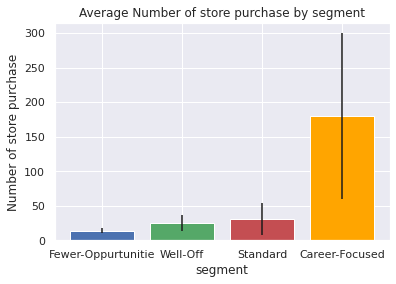

In [29]:
plt.bar(x=purch_analy_mean.index,
           height=purch_analy_mean['Number of Purchase'],
           yerr=purch_analy_std['Number of Purchase'],
        color=('b','g','r','orange')
       )
plt.xlabel('segment')
plt.ylabel('Number of store purchase')
plt.title('Average Number of store purchase by segment')

# **Brand Choice**

In [30]:
purch_incid=purch[purch['Incidence']==1]
brand=pd.DataFrame(pd.get_dummies(purch_incid['Brand'],prefix='Brand',prefix_sep='_'))
brand['segment']=purch_incid['segment']
brand['ID']=purch_incid['ID']
brand

,Brand_1,Brand_2,Brand_3,Brand_4,Brand_5,segment,ID
6,0,1,0,0,0,3,200000001
11,0,0,0,0,1,3,200000001
19,1,0,0,0,0,3,200000001
24,0,0,0,1,0,3,200000001
29,0,1,0,0,0,3,200000001
...,...,...,...,...,...,...,...
58621,0,1,0,0,0,3,200000500
58648,1,0,0,0,0,3,200000500
58674,0,1,0,0,0,3,200000500
58687,0,1,0,0,0,3,200000500


In [31]:
brand.groupby("ID").mean().round()


,Brand_1,Brand_2,Brand_3,Brand_4,Brand_5,segment
ID,,,,,,
200000001,0.0,0.0,0.0,0.0,0.0,3.0
200000002,0.0,0.0,0.0,1.0,0.0,3.0
200000003,0.0,1.0,0.0,0.0,0.0,3.0
200000004,0.0,0.0,0.0,0.0,1.0,3.0
200000005,0.0,0.0,0.0,0.0,1.0,3.0
...,...,...,...,...,...,...
200000496,0.0,1.0,0.0,0.0,0.0,3.0
200000497,0.0,1.0,0.0,0.0,0.0,3.0
200000498,0.0,1.0,0.0,0.0,0.0,3.0


In [32]:
brand_mean=brand.groupby("segment").mean().round(2)
brand_mean=brand_mean[['Brand_1', 'Brand_2', 'Brand_3', 'Brand_4', 'Brand_5']]
brand_mean

,Brand_1,Brand_2,Brand_3,Brand_4,Brand_5
segment,,,,,
0,0.65,0.35,0.00,0.00,0.00
1,0.32,0.43,0.01,0.15,0.08
2,0.35,0.65,0.00,0.00,0.00
3,0.08,0.31,0.06,0.20,0.35


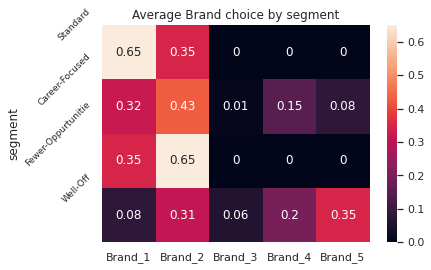

In [33]:
sns.heatmap(brand_mean,annot=True)
plt.yticks([0,1,2,3],['Standard','Career-Focused','Fewer-Oppurtunitie','Well-Off'],rotation=45,fontsize=9)
plt.title("Average Brand choice by segment")
plt.show()

# **Revenue**

In [34]:
purch_incid

,index,ID,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,...,Promotion_4,Promotion_5,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,segment
6,6,200000001,28,1,2,2,0,0,1.50,1.90,...,0,0,0,0,47,1,110866,1,0,3
11,11,200000001,58,1,5,1,0,0,1.39,1.90,...,0,1,0,0,47,1,110866,1,0,3
19,19,200000001,110,1,1,2,0,0,1.47,1.90,...,1,0,0,0,47,1,110866,1,0,3
24,24,200000001,142,1,4,1,0,0,1.21,1.35,...,0,0,0,0,47,1,110866,1,0,3
29,29,200000001,183,1,2,3,0,0,1.46,1.88,...,1,1,0,0,47,1,110866,1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58621,58621,200000500,296,1,2,6,0,0,1.48,1.89,...,0,0,0,0,42,1,120946,1,0,3
58648,58648,200000500,460,1,1,12,0,0,1.35,1.57,...,0,0,0,0,42,1,120946,1,0,3
58674,58674,200000500,641,1,2,7,0,0,1.50,1.85,...,0,0,0,0,42,1,120946,1,0,3
58687,58687,200000500,697,1,2,6,0,0,1.42,1.51,...,0,0,0,0,42,1,120946,1,0,3


In [35]:
purch_incid=purch[purch['Incidence']==1]
brand_revenue=pd.DataFrame(purch_incid['Price_1']*purch_incid['Quantity'],columns=['revenue brand 1'])
brand_revenue['revenue brand 2']=purch_incid['Price_2']*purch_incid['Quantity']
brand_revenue['revenue brand 3']=purch_incid['Price_3']*purch_incid['Quantity']
brand_revenue['revenue brand 4']=purch_incid['Price_4']*purch_incid['Quantity']
brand_revenue['revenue brand 5']=purch_incid['Price_5']*purch_incid['Quantity']
brand_revenue['segment']=purch_incid['segment']
brand_revenue=brand_revenue.groupby('segment').sum()
brand_revenue['Total Revenue']=brand_revenue['revenue brand 1']+brand_revenue['revenue brand 2']+brand_revenue['revenue brand 3']+brand_revenue['revenue brand 4']+brand_revenue['revenue brand 5']
brand_revenue

,revenue brand 1,revenue brand 2,revenue brand 3,revenue brand 4,revenue brand 5,Total Revenue
segment,,,,,,
0,154.69,202.74,227.46,243.53,301.57,1129.99
1,244.30,311.69,357.92,385.44,475.35,1774.70
2,359.67,466.62,529.60,573.30,704.23,2633.42
3,55363.36,70379.50,80394.94,86520.57,106324.24,398982.61


# **Customer Pedictive Analysis**

In [36]:
purch=pd.read_csv('../input/purchase-segmentation/purchase_segmentation.csv',index_col=[0])
purch

,ID,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,...,Age,Education,Income,Occupation,Settlement size,segment,segment_0,segment_1,segment_2,segment_3
0,200000001,1,0,0,0,0,0,1.59,1.87,2.01,...,47,1,110866,1,0,0,1,0,0,0
1,200000001,11,0,0,0,0,0,1.51,1.89,1.99,...,47,1,110866,1,0,0,1,0,0,0
2,200000001,12,0,0,0,0,0,1.51,1.89,1.99,...,47,1,110866,1,0,0,1,0,0,0
3,200000001,16,0,0,0,0,0,1.52,1.89,1.98,...,47,1,110866,1,0,0,1,0,0,0
4,200000001,18,0,0,0,0,0,1.52,1.89,1.99,...,47,1,110866,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58688,200000500,703,0,0,0,2,1,1.41,1.85,2.01,...,42,1,120946,1,0,0,1,0,0,0
58689,200000500,710,0,0,0,0,0,1.36,1.84,2.09,...,42,1,120946,1,0,0,1,0,0,0
58690,200000500,717,0,0,0,0,0,1.50,1.80,2.14,...,42,1,120946,1,0,0,1,0,0,0
58691,200000500,722,1,2,3,0,0,1.51,1.82,2.09,...,42,1,120946,1,0,0,1,0,0,0


# **Logistic Regression**

In [37]:
y=purch['Incidence']

In [38]:
x=pd.DataFrame()
x['mean price']=(purch['Price_1']+purch['Price_2']+purch['Price_3']+purch['Price_4']+purch['Price_5'])/5


In [39]:
model=LogisticRegression(solver='sag')
model.fit(x,y)
model.coef_

array([[-2.34904498]])

# **price elasticity of purchase probability**

In [40]:
purch[['Price_1','Price_2',"Price_3","Price_4","Price_5"]].describe()

,Price_1,Price_2,Price_3,Price_4,Price_5
count,58693.000000,58693.000000,58693.000000,58693.000000,58693.000000
mean,1.392074,1.780999,2.006789,2.159945,2.654798
std,0.091139,0.170868,0.046867,0.089825,0.098272
min,1.100000,1.260000,1.870000,1.760000,2.110000
25%,1.340000,1.580000,1.970000,2.120000,2.630000
50%,1.390000,1.880000,2.010000,2.170000,2.670000
75%,1.470000,1.890000,2.060000,2.240000,2.700000
max,1.590000,1.900000,2.140000,2.260000,2.800000


In [41]:
price_range=np.arange(0.5,3.5,0.01)
print(price_range)
print('lenght:',len(price_range))

[0.5  0.51 0.52 0.53 0.54 0.55 0.56 0.57 0.58 0.59 0.6  0.61 0.62 0.63
 0.64 0.65 0.66 0.67 0.68 0.69 0.7  0.71 0.72 0.73 0.74 0.75 0.76 0.77
 0.78 0.79 0.8  0.81 0.82 0.83 0.84 0.85 0.86 0.87 0.88 0.89 0.9  0.91
 0.92 0.93 0.94 0.95 0.96 0.97 0.98 0.99 1.   1.01 1.02 1.03 1.04 1.05
 1.06 1.07 1.08 1.09 1.1  1.11 1.12 1.13 1.14 1.15 1.16 1.17 1.18 1.19
 1.2  1.21 1.22 1.23 1.24 1.25 1.26 1.27 1.28 1.29 1.3  1.31 1.32 1.33
 1.34 1.35 1.36 1.37 1.38 1.39 1.4  1.41 1.42 1.43 1.44 1.45 1.46 1.47
 1.48 1.49 1.5  1.51 1.52 1.53 1.54 1.55 1.56 1.57 1.58 1.59 1.6  1.61
 1.62 1.63 1.64 1.65 1.66 1.67 1.68 1.69 1.7  1.71 1.72 1.73 1.74 1.75
 1.76 1.77 1.78 1.79 1.8  1.81 1.82 1.83 1.84 1.85 1.86 1.87 1.88 1.89
 1.9  1.91 1.92 1.93 1.94 1.95 1.96 1.97 1.98 1.99 2.   2.01 2.02 2.03
 2.04 2.05 2.06 2.07 2.08 2.09 2.1  2.11 2.12 2.13 2.14 2.15 2.16 2.17
 2.18 2.19 2.2  2.21 2.22 2.23 2.24 2.25 2.26 2.27 2.28 2.29 2.3  2.31
 2.32 2.33 2.34 2.35 2.36 2.37 2.38 2.39 2.4  2.41 2.42 2.43 2.44 2.45
 2.46 

In [42]:
df_price_range=pd.DataFrame(price_range,columns=['Price Range'])
df_price_range

,Price Range
0,0.50
1,0.51
2,0.52
3,0.53
4,0.54
...,...
295,3.45
296,3.46
297,3.47
298,3.48


In [43]:
purch_prob=model.predict_proba(df_price_range)

In [44]:
purchase_elasticity=model.coef_[:,0]*price_range*(1-purch_prob[:,1])

In [45]:
pd.options.display.max_rows=50

In [46]:
price_elasticity=df_price_range.copy()
price_elasticity["Mean PE"]=purchase_elasticity 
price_elasticity

,Price Range,Mean PE
0,0.50,-0.096406
1,0.51,-0.100476
2,0.52,-0.104672
3,0.53,-0.108999
4,0.54,-0.113459
...,...,...
295,3.45,-8.016501
296,3.46,-8.041758
297,3.47,-8.066980
298,3.48,-8.092169


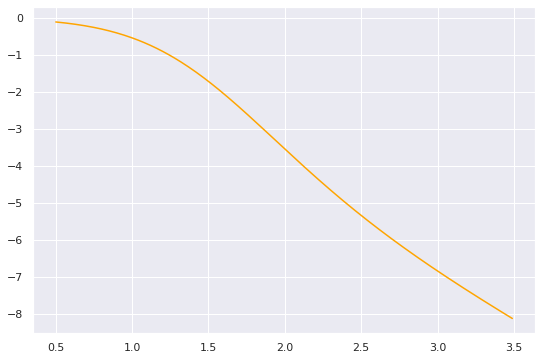

In [47]:
plt.figure(figsize=(9,6))
plt.plot(price_range,purchase_elasticity,'orange')

# **Purchase Probablity by Segment**

In [48]:
purch

,ID,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,...,Age,Education,Income,Occupation,Settlement size,segment,segment_0,segment_1,segment_2,segment_3
0,200000001,1,0,0,0,0,0,1.59,1.87,2.01,...,47,1,110866,1,0,0,1,0,0,0
1,200000001,11,0,0,0,0,0,1.51,1.89,1.99,...,47,1,110866,1,0,0,1,0,0,0
2,200000001,12,0,0,0,0,0,1.51,1.89,1.99,...,47,1,110866,1,0,0,1,0,0,0
3,200000001,16,0,0,0,0,0,1.52,1.89,1.98,...,47,1,110866,1,0,0,1,0,0,0
4,200000001,18,0,0,0,0,0,1.52,1.89,1.99,...,47,1,110866,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58688,200000500,703,0,0,0,2,1,1.41,1.85,2.01,...,42,1,120946,1,0,0,1,0,0,0
58689,200000500,710,0,0,0,0,0,1.36,1.84,2.09,...,42,1,120946,1,0,0,1,0,0,0
58690,200000500,717,0,0,0,0,0,1.50,1.80,2.14,...,42,1,120946,1,0,0,1,0,0,0
58691,200000500,722,1,2,3,0,0,1.51,1.82,2.09,...,42,1,120946,1,0,0,1,0,0,0


In [49]:
pur_seg=purch[['Incidence','Sex', 'Marital status', 'Age',
       'Education', 'Income', 'Occupation', 'Settlement size', 'segment']].groupby('segment').mean().round(3)
pur_seg

,Incidence,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
segment,,,,,,,,
0,0.200,0.274,0.104,36.091,0.778,96579.829,0.275,0.049
1,0.321,0.032,0.158,37.820,0.817,140556.482,1.286,1.446
2,0.212,0.891,0.913,29.472,1.054,108731.349,0.683,0.412
3,0.296,0.486,0.668,55.026,2.108,161144.812,1.199,1.115


In [50]:
pur_seg.rename({0:'Few opportunities',1:"standard",2:'Well off',3:'career Focused'},inplace=True)
pur_seg

,Incidence,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
segment,,,,,,,,
Few opportunities,0.200,0.274,0.104,36.091,0.778,96579.829,0.275,0.049
standard,0.321,0.032,0.158,37.820,0.817,140556.482,1.286,1.446
Well off,0.212,0.891,0.913,29.472,1.054,108731.349,0.683,0.412
career Focused,0.296,0.486,0.668,55.026,2.108,161144.812,1.199,1.115


In [51]:
purch['Label']=purch['segment'].map({0:'Few opportunities',1:"standard",2:'Well off',3:'career Focused'})
purch

,ID,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,...,Education,Income,Occupation,Settlement size,segment,segment_0,segment_1,segment_2,segment_3,Label
0,200000001,1,0,0,0,0,0,1.59,1.87,2.01,...,1,110866,1,0,0,1,0,0,0,Few opportunities
1,200000001,11,0,0,0,0,0,1.51,1.89,1.99,...,1,110866,1,0,0,1,0,0,0,Few opportunities
2,200000001,12,0,0,0,0,0,1.51,1.89,1.99,...,1,110866,1,0,0,1,0,0,0,Few opportunities
3,200000001,16,0,0,0,0,0,1.52,1.89,1.98,...,1,110866,1,0,0,1,0,0,0,Few opportunities
4,200000001,18,0,0,0,0,0,1.52,1.89,1.99,...,1,110866,1,0,0,1,0,0,0,Few opportunities
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58688,200000500,703,0,0,0,2,1,1.41,1.85,2.01,...,1,120946,1,0,0,1,0,0,0,Few opportunities
58689,200000500,710,0,0,0,0,0,1.36,1.84,2.09,...,1,120946,1,0,0,1,0,0,0,Few opportunities
58690,200000500,717,0,0,0,0,0,1.50,1.80,2.14,...,1,120946,1,0,0,1,0,0,0,Few opportunities
58691,200000500,722,1,2,3,0,0,1.51,1.82,2.09,...,1,120946,1,0,0,1,0,0,0,Few opportunities


# **Few Opportunities**

In [52]:
purch_few=purch[purch['segment']==0]
purch_few

,ID,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,...,Education,Income,Occupation,Settlement size,segment,segment_0,segment_1,segment_2,segment_3,Label
0,200000001,1,0,0,0,0,0,1.59,1.87,2.01,...,1,110866,1,0,0,1,0,0,0,Few opportunities
1,200000001,11,0,0,0,0,0,1.51,1.89,1.99,...,1,110866,1,0,0,1,0,0,0,Few opportunities
2,200000001,12,0,0,0,0,0,1.51,1.89,1.99,...,1,110866,1,0,0,1,0,0,0,Few opportunities
3,200000001,16,0,0,0,0,0,1.52,1.89,1.98,...,1,110866,1,0,0,1,0,0,0,Few opportunities
4,200000001,18,0,0,0,0,0,1.52,1.89,1.99,...,1,110866,1,0,0,1,0,0,0,Few opportunities
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58688,200000500,703,0,0,0,2,1,1.41,1.85,2.01,...,1,120946,1,0,0,1,0,0,0,Few opportunities
58689,200000500,710,0,0,0,0,0,1.36,1.84,2.09,...,1,120946,1,0,0,1,0,0,0,Few opportunities
58690,200000500,717,0,0,0,0,0,1.50,1.80,2.14,...,1,120946,1,0,0,1,0,0,0,Few opportunities
58691,200000500,722,1,2,3,0,0,1.51,1.82,2.09,...,1,120946,1,0,0,1,0,0,0,Few opportunities


In [53]:
y=purch_few['Incidence']
x=pd.DataFrame()
x['mean_price']=(purch_few['Price_1']+purch_few['Price_2']+purch_few['Price_3']+purch_few['Price_4']+purch_few['Price_5'])/5
model=LogisticRegression(solver="sag")
model.fit(x,y)
model.coef_

array([[-3.60427721]])

In [54]:
purchase_prob=model.predict_proba(df_price_range)
purchase_elasticity=model.coef_[:,0]*price_range*(1-purchase_prob[:,1])
price_elasticity['PE Few Oppur']=purchase_elasticity
price_elasticity

,Price Range,Mean PE,PE Few Oppur
0,0.50,-0.096406,-0.032274
1,0.51,-0.100476,-0.034105
2,0.52,-0.104672,-0.036026
3,0.53,-0.108999,-0.038039
4,0.54,-0.113459,-0.040150
...,...,...,...
295,3.45,-8.016501,-12.418333
296,3.46,-8.041758,-12.454911
297,3.47,-8.066980,-12.491471
298,3.48,-8.092169,-12.528014


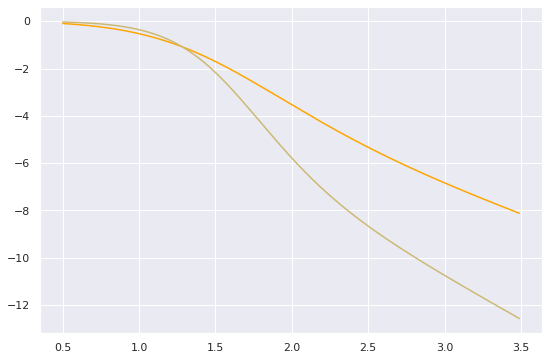

In [55]:
plt.figure(figsize=(9,6))
plt.plot(price_elasticity['Price Range'],price_elasticity['Mean PE'],'orange')
plt.plot(price_elasticity['Price Range'],price_elasticity['PE Few Oppur'],'y')

# **Standard**

In [56]:
purch_standard=purch[purch['segment']==1]
y=purch_standard['Incidence']
x=pd.DataFrame()
x['mean_price']=(purch_standard['Price_1']+purch_standard['Price_2']+purch_standard['Price_3']+purch_standard['Price_4']+purch_standard['Price_5'])/5
model1=LogisticRegression(solver="sag")
model1.fit(x,y)
model1.coef_
purchase_prob=model1.predict_proba(df_price_range)
purchase_elasticity=model1.coef_[:,0]*price_range*(1-purchase_prob[:,1])
price_elasticity['PE Standard']=purchase_elasticity
price_elasticity

,Price Range,Mean PE,PE Few Oppur,PE Standard
0,0.50,-0.096406,-0.032274,-0.118694
1,0.51,-0.100476,-0.034105,-0.122878
2,0.52,-0.104672,-0.036026,-0.127156
3,0.53,-0.108999,-0.038039,-0.131529
4,0.54,-0.113459,-0.040150,-0.135999
...,...,...,...,...
295,3.45,-8.016501,-12.418333,-5.722076
296,3.46,-8.041758,-12.454911,-5.742328
297,3.47,-8.066980,-12.491471,-5.762542
298,3.48,-8.092169,-12.528014,-5.782719


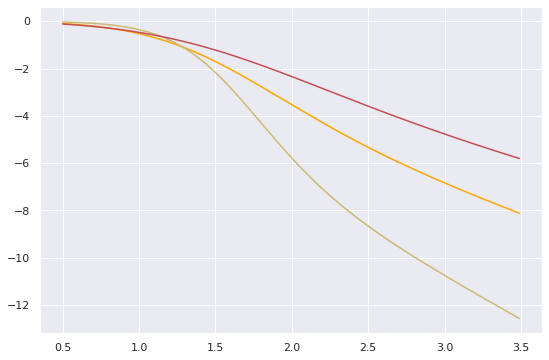

In [57]:
plt.figure(figsize=(9,6))
plt.plot(price_elasticity['Price Range'],price_elasticity['Mean PE'],'orange')
plt.plot(price_elasticity['Price Range'],price_elasticity['PE Few Oppur'],'y')
plt.plot(price_elasticity['Price Range'],price_elasticity['PE Standard'],'r')

# **Well-Off**

In [58]:
purch_well=purch[purch['segment']==2]
y=purch_well['Incidence']
x=pd.DataFrame()
x['mean_price']=(purch_well['Price_1']+purch_well['Price_2']+purch_well['Price_3']+purch_well['Price_4']+purch_well['Price_5'])/5
model1=LogisticRegression(solver="sag")
model1.fit(x,y)
model1.coef_
purchase_prob=model1.predict_proba(df_price_range)
purchase_elasticity=model1.coef_[:,0]*price_range*(1-purchase_prob[:,1])
price_elasticity['PE well']=purchase_elasticity
price_elasticity

,Price Range,Mean PE,PE Few Oppur,PE Standard,PE well
0,0.50,-0.096406,-0.032274,-0.118694,-0.211150
1,0.51,-0.100476,-0.034105,-0.122878,-0.217719
2,0.52,-0.104672,-0.036026,-0.127156,-0.224397
3,0.53,-0.108999,-0.038039,-0.131529,-0.231182
4,0.54,-0.113459,-0.040150,-0.135999,-0.238077
...,...,...,...,...,...
295,3.45,-8.016501,-12.418333,-5.722076,-5.051448
296,3.46,-8.041758,-12.454911,-5.742328,-5.068303
297,3.47,-8.066980,-12.491471,-5.762542,-5.085140
298,3.48,-8.092169,-12.528014,-5.782719,-5.101959


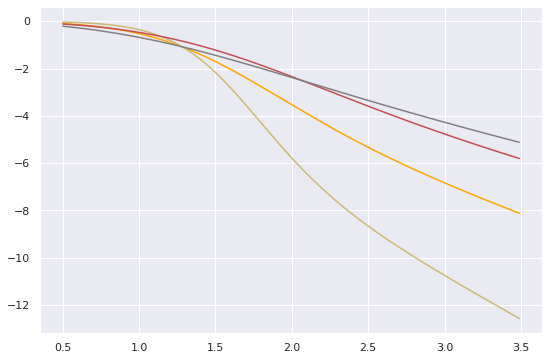

In [59]:
plt.figure(figsize=(9,6))
plt.plot(price_elasticity['Price Range'],price_elasticity['Mean PE'],'orange')
plt.plot(price_elasticity['Price Range'],price_elasticity['PE Few Oppur'],'y')
plt.plot(price_elasticity['Price Range'],price_elasticity['PE Standard'],'r')
plt.plot(price_elasticity['Price Range'],price_elasticity['PE well'],'grey')

# **Standard**

In [60]:
purch_career=purch[purch['segment']==3]
y=purch_career['Incidence']
x=pd.DataFrame()
x['mean_price']=(purch_career['Price_1']+purch_career['Price_2']+purch_career['Price_3']+purch_career['Price_4']+purch_career['Price_5'])/5
model1=LogisticRegression(solver="sag")
model1.fit(x,y)
model1.coef_
purchase_prob=model1.predict_proba(df_price_range)
purchase_elasticity=model1.coef_[:,0]*price_range*(1-purchase_prob[:,1])
price_elasticity['PE Career']=purchase_elasticity
price_elasticity

,Price Range,Mean PE,PE Few Oppur,PE Standard,PE well,PE Career
0,0.50,-0.096406,-0.032274,-0.118694,-0.211150,-0.164929
1,0.51,-0.100476,-0.034105,-0.122878,-0.217719,-0.169837
2,0.52,-0.104672,-0.036026,-0.127156,-0.224397,-0.174820
3,0.53,-0.108999,-0.038039,-0.131529,-0.231182,-0.179876
4,0.54,-0.113459,-0.040150,-0.135999,-0.238077,-0.185006
...,...,...,...,...,...,...
295,3.45,-8.016501,-12.418333,-5.722076,-5.051448,-4.157828
296,3.46,-8.041758,-12.454911,-5.742328,-5.068303,-4.173153
297,3.47,-8.066980,-12.491471,-5.762542,-5.085140,-4.188459
298,3.48,-8.092169,-12.528014,-5.782719,-5.101959,-4.203748


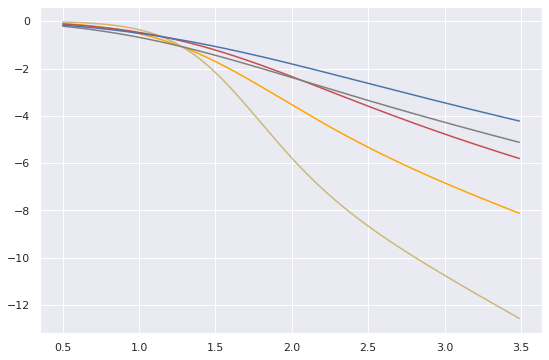

In [61]:
plt.figure(figsize=(9,6))
plt.plot(price_elasticity['Price Range'],price_elasticity['Mean PE'],'orange')
plt.plot(price_elasticity['Price Range'],price_elasticity['PE Few Oppur'],'y')
plt.plot(price_elasticity['Price Range'],price_elasticity['PE Standard'],'r')
plt.plot(price_elasticity['Price Range'],price_elasticity['PE well'],'grey')
plt.plot(price_elasticity['Price Range'],price_elasticity['PE Career'],'b')


# **Purchase Probability with Promotion**

In [62]:
purch.sample(5)

,ID,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,...,Education,Income,Occupation,Settlement size,segment,segment_0,segment_1,segment_2,segment_3,Label
46375,200000399,161,0,0,0,0,0,1.39,1.90,1.94,...,1,147626,2,2,1,0,1,0,0,standard
53283,200000457,11,1,4,3,0,0,1.51,1.89,1.99,...,2,194882,2,1,3,0,0,0,1,career Focused
4831,200000043,91,0,0,0,0,0,1.39,1.58,1.99,...,1,67861,0,0,0,1,0,0,0,Few opportunities
13689,200000119,685,0,0,0,0,0,1.42,1.87,2.06,...,2,120160,1,0,3,0,0,0,1,career Focused
43278,200000372,593,1,4,4,0,0,1.42,1.85,2.06,...,2,135534,1,2,3,0,0,0,1,career Focused


In [63]:
y=purch["Incidence"]
x=pd.DataFrame()
x['mean price']=(purch['Price_1']+purch['Price_2']+purch['Price_3']+purch['Price_4']+purch['Price_5'])/5
x['mean_promotion']=(purch["Promotion_1"]+purch["Promotion_2"]+purch["Promotion_3"]+purch["Promotion_4"]+purch["Promotion_5"])/5
x

,mean price,mean_promotion
0,2.044,0.2
1,2.028,0.0
2,2.028,0.0
3,2.028,0.0
4,2.030,0.0
...,...,...
58688,2.060,0.2
58689,2.060,0.0
58690,2.086,0.0
58691,2.092,0.0


In [64]:
model=LogisticRegression(solver="sag")
model.fit(x,y)
model.coef_

array([[-1.49401162,  0.5615233 ]])

In [65]:
model.coef_[:,0]

array([-1.49401162])

In [66]:
df_price=pd.DataFrame(price_range,columns=["price range"])
df_price["promotion"]=1
prom_prob=model.predict_proba(df_price)
prom_elasticity=model.coef_[:,0]*price_range*(1-prom_prob[:,1])
price_elasticity["promotion"]=prom_elasticity
price_elasticity

,Price Range,Mean PE,PE Few Oppur,PE Standard,PE well,PE Career,promotion
0,0.50,-0.096406,-0.032274,-0.118694,-0.211150,-0.164929,-0.125728
1,0.51,-0.100476,-0.034105,-0.122878,-0.217719,-0.169837,-0.129844
2,0.52,-0.104672,-0.036026,-0.127156,-0.224397,-0.174820,-0.134039
3,0.53,-0.108999,-0.038039,-0.131529,-0.231182,-0.179876,-0.138314
4,0.54,-0.113459,-0.040150,-0.135999,-0.238077,-0.185006,-0.142670
...,...,...,...,...,...,...,...
295,3.45,-8.016501,-12.418333,-5.722076,-5.051448,-4.157828,-4.861556
296,3.46,-8.041758,-12.454911,-5.742328,-5.068303,-4.173153,-4.879758
297,3.47,-8.066980,-12.491471,-5.762542,-5.085140,-4.188459,-4.897929
298,3.48,-8.092169,-12.528014,-5.782719,-5.101959,-4.203748,-4.916070


In [67]:
df_price=pd.DataFrame(price_range,columns=["price range"])
df_price["promotion"]=1
prom_prob=model.predict_proba(df_price)
prom_elasticity=model.coef_[:,0]*price_range*(1-prom_prob[:,0])
price_elasticity["no_promotion"]=prom_elasticity
price_elasticity

,Price Range,Mean PE,PE Few Oppur,PE Standard,PE well,PE Career,promotion,no_promotion
0,0.50,-0.096406,-0.032274,-0.118694,-0.211150,-0.164929,-0.125728,-0.621278
1,0.51,-0.100476,-0.034105,-0.122878,-0.217719,-0.169837,-0.129844,-0.632102
2,0.52,-0.104672,-0.036026,-0.127156,-0.224397,-0.174820,-0.134039,-0.642847
3,0.53,-0.108999,-0.038039,-0.131529,-0.231182,-0.179876,-0.138314,-0.653512
4,0.54,-0.113459,-0.040150,-0.135999,-0.238077,-0.185006,-0.142670,-0.664096
...,...,...,...,...,...,...,...,...
295,3.45,-8.016501,-12.418333,-5.722076,-5.051448,-4.157828,-4.861556,-0.292784
296,3.46,-8.041758,-12.454911,-5.742328,-5.068303,-4.173153,-4.879758,-0.289522
297,3.47,-8.066980,-12.491471,-5.762542,-5.085140,-4.188459,-4.897929,-0.286291
298,3.48,-8.092169,-12.528014,-5.782719,-5.101959,-4.203748,-4.916070,-0.283090


Text(0.5, 1.0, 'Price Elasticity of Purchase Probability with and without promotion')

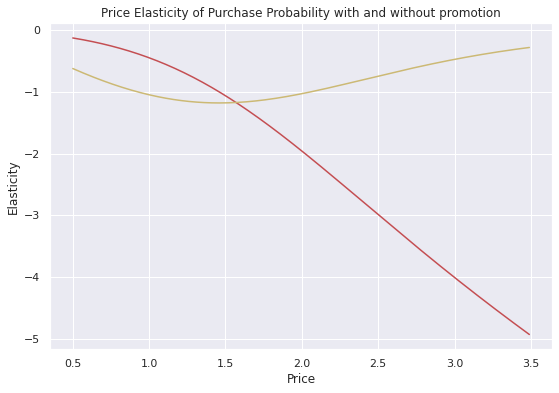

In [68]:
plt.figure(figsize=(9,6))
plt.plot(price_elasticity['Price Range'],price_elasticity['promotion'],'r')
plt.plot(price_elasticity['Price Range'],price_elasticity['no_promotion'],'y')
plt.xlabel("Price")
plt.ylabel("Elasticity")
plt.title("Price Elasticity of Purchase Probability with and without promotion")

# **Brand Choice**

In [69]:
brand_choice=purch[purch['Incidence']==1]
y=brand_choice['Brand']
x=pd.DataFrame(brand_choice[['Price_1', 'Price_2', 'Price_3', 'Price_4',
       'Price_5']])
model=LogisticRegression(solver='sag',multi_class='multinomial')
model.fit(x,y)
model.coef_

array([[-3.91594971,  0.6584645 ,  2.41774658,  0.70408919, -0.20209667],
       [ 1.2746186 , -1.87985249, -0.21262294, -0.20633831,  0.58787677],
       [ 1.62416117,  0.56209498,  0.50078745,  1.03949332,  0.45275442],
       [ 0.57454428,  0.39559151, -1.4005808 , -1.24624023,  0.24935865],
       [ 0.44262567,  0.26370151, -1.30533029, -0.29100396, -1.08789316]])

In [70]:
model_coef=pd.DataFrame((np.transpose(model.coef_)),index=['Price_1', 'Price_2', 'Price_3', 'Price_4',
       'Price_5'],columns=['coef_brand 1','coef_brand 2','coef_brand 3','coef_brand 4','coef_brand 5'])
model_coef

,coef_brand 1,coef_brand 2,coef_brand 3,coef_brand 4,coef_brand 5
Price_1,-3.915950,1.274619,1.624161,0.574544,0.442626
Price_2,0.658464,-1.879852,0.562095,0.395592,0.263702
Price_3,2.417747,-0.212623,0.500787,-1.400581,-1.305330
Price_4,0.704089,-0.206338,1.039493,-1.246240,-0.291004
Price_5,-0.202097,0.587877,0.452754,0.249359,-1.087893


# **own prices Elasticity Brand 1**

In [71]:
own_brand_1=pd.DataFrame(index=np.arange(price_range.size))
own_brand_1['price_1']=price_range
own_brand_1['price_2']=brand_choice['Price_5'].mean()
own_brand_1['price_3']=brand_choice['Price_5'].mean()
own_brand_1['price_4']=brand_choice['Price_5'].mean()
own_brand_1['price_5']=brand_choice['Price_5'].mean()
pred_brand_1=model.predict_proba(own_brand_1)
own_price_elasticity_brand_1=model_coef.iloc[0,0]*price_range*(1-pred_brand_1[:,0])
price_elasticity['brand_1']=own_price_elasticity_brand_1
price_elasticity

,Price Range,Mean PE,PE Few Oppur,PE Standard,PE well,PE Career,promotion,no_promotion,brand_1
0,0.50,-0.096406,-0.032274,-0.118694,-0.211150,-0.164929,-0.125728,-0.621278,-0.012698
1,0.51,-0.100476,-0.034105,-0.122878,-0.217719,-0.169837,-0.129844,-0.632102,-0.013574
2,0.52,-0.104672,-0.036026,-0.127156,-0.224397,-0.174820,-0.134039,-0.642847,-0.014506
3,0.53,-0.108999,-0.038039,-0.131529,-0.231182,-0.179876,-0.138314,-0.653512,-0.015496
4,0.54,-0.113459,-0.040150,-0.135999,-0.238077,-0.185006,-0.142670,-0.664096,-0.016547
...,...,...,...,...,...,...,...,...,...
295,3.45,-8.016501,-12.418333,-5.722076,-5.051448,-4.157828,-4.861556,-0.292784,-13.509457
296,3.46,-8.041758,-12.454911,-5.742328,-5.068303,-4.173153,-4.879758,-0.289522,-13.548645
297,3.47,-8.066980,-12.491471,-5.762542,-5.085140,-4.188459,-4.897929,-0.286291,-13.587831
298,3.48,-8.092169,-12.528014,-5.782719,-5.101959,-4.203748,-4.916070,-0.283090,-13.627016


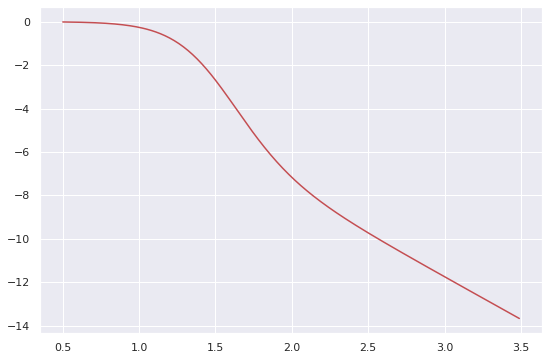

In [72]:
plt.figure(figsize=(9,6))
plt.plot(price_elasticity['Price Range'],price_elasticity['brand_1'],'r')

# **own prices Elasticity Brand 2**

In [73]:
own_brand_2=pd.DataFrame(index=np.arange(price_range.size))
own_brand_2['price_1']=brand_choice['Price_1'].mean()
own_brand_2['price_2']=price_range
own_brand_2['price_3']=brand_choice['Price_5'].mean()
own_brand_2['price_4']=brand_choice['Price_5'].mean()
own_brand_2['price_5']=brand_choice['Price_5'].mean()
pred_brand_2=model.predict_proba(own_brand_2)
own_price_elasticity_brand_2=model_coef.iloc[1,1]*price_range*(1-pred_brand_2[:,1])
price_elasticity['brand_2']=own_price_elasticity_brand_2
price_elasticity

,Price Range,Mean PE,PE Few Oppur,PE Standard,PE well,PE Career,promotion,no_promotion,brand_1,brand_2
0,0.50,-0.096406,-0.032274,-0.118694,-0.211150,-0.164929,-0.125728,-0.621278,-0.012698,-0.134252
1,0.51,-0.100476,-0.034105,-0.122878,-0.217719,-0.169837,-0.129844,-0.632102,-0.013574,-0.139807
2,0.52,-0.104672,-0.036026,-0.127156,-0.224397,-0.174820,-0.134039,-0.642847,-0.014506,-0.145525
3,0.53,-0.108999,-0.038039,-0.131529,-0.231182,-0.179876,-0.138314,-0.653512,-0.015496,-0.151409
4,0.54,-0.113459,-0.040150,-0.135999,-0.238077,-0.185006,-0.142670,-0.664096,-0.016547,-0.157465
...,...,...,...,...,...,...,...,...,...,...
295,3.45,-8.016501,-12.418333,-5.722076,-5.051448,-4.157828,-4.861556,-0.292784,-13.509457,-6.457782
296,3.46,-8.041758,-12.454911,-5.742328,-5.068303,-4.173153,-4.879758,-0.289522,-13.548645,-6.477179
297,3.47,-8.066980,-12.491471,-5.762542,-5.085140,-4.188459,-4.897929,-0.286291,-13.587831,-6.496563
298,3.48,-8.092169,-12.528014,-5.782719,-5.101959,-4.203748,-4.916070,-0.283090,-13.627016,-6.515934


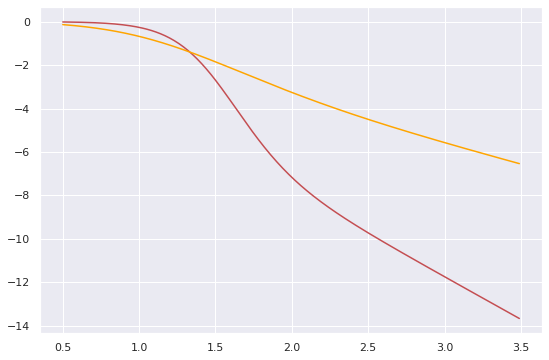

In [74]:
plt.figure(figsize=(9,6))
plt.plot(price_elasticity['Price Range'],price_elasticity['brand_1'],'r')
plt.plot(price_elasticity['Price Range'],price_elasticity['brand_2'],'orange')

# **own prices Elasticity Brand 3**

In [75]:
own_brand_3=pd.DataFrame(index=np.arange(price_range.size))
own_brand_3['price_1']=brand_choice['Price_1'].mean()
own_brand_3['price_2']=brand_choice['Price_2'].mean()
own_brand_3['price_3']=price_range
own_brand_3['price_4']=brand_choice['Price_5'].mean()
own_brand_3['price_5']=brand_choice['Price_5'].mean()
pred_brand_3=model.predict_proba(own_brand_3)
own_price_elasticity_brand_3=model_coef.iloc[2,2]*price_range*(1-pred_brand_3[:,2])
price_elasticity['brand_3']=own_price_elasticity_brand_3
price_elasticity

,Price Range,Mean PE,PE Few Oppur,PE Standard,PE well,PE Career,promotion,no_promotion,brand_1,brand_2,brand_3
0,0.50,-0.096406,-0.032274,-0.118694,-0.211150,-0.164929,-0.125728,-0.621278,-0.012698,-0.134252,0.247154
1,0.51,-0.100476,-0.034105,-0.122878,-0.217719,-0.169837,-0.129844,-0.632102,-0.013574,-0.139807,0.252041
2,0.52,-0.104672,-0.036026,-0.127156,-0.224397,-0.174820,-0.134039,-0.642847,-0.014506,-0.145525,0.256925
3,0.53,-0.108999,-0.038039,-0.131529,-0.231182,-0.179876,-0.138314,-0.653512,-0.015496,-0.151409,0.261805
4,0.54,-0.113459,-0.040150,-0.135999,-0.238077,-0.185006,-0.142670,-0.664096,-0.016547,-0.157465,0.266683
...,...,...,...,...,...,...,...,...,...,...,...
295,3.45,-8.016501,-12.418333,-5.722076,-5.051448,-4.157828,-4.861556,-0.292784,-13.509457,-6.457782,1.649992
296,3.46,-8.041758,-12.454911,-5.742328,-5.068303,-4.173153,-4.879758,-0.289522,-13.548645,-6.477179,1.656058
297,3.47,-8.066980,-12.491471,-5.762542,-5.085140,-4.188459,-4.897929,-0.286291,-13.587831,-6.496563,1.662115
298,3.48,-8.092169,-12.528014,-5.782719,-5.101959,-4.203748,-4.916070,-0.283090,-13.627016,-6.515934,1.668162


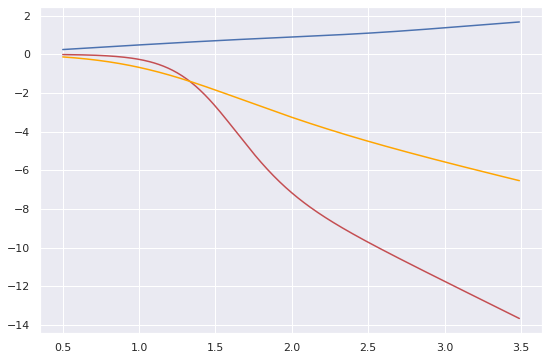

In [76]:
plt.figure(figsize=(9,6))
plt.plot(price_elasticity['Price Range'],price_elasticity['brand_1'],'r')
plt.plot(price_elasticity['Price Range'],price_elasticity['brand_2'],'orange')
plt.plot(price_elasticity['Price Range'],price_elasticity['brand_3'],'b')

# **own prices Elasticity Brand 4**

In [77]:
own_brand_4=pd.DataFrame(index=np.arange(price_range.size))
own_brand_4['price_1']=brand_choice['Price_1'].mean()
own_brand_4['price_2']=brand_choice['Price_2'].mean()
own_brand_4['price_3']=brand_choice['Price_3'].mean()
own_brand_4['price_4']=price_range
own_brand_4['price_5']=brand_choice['Price_5'].mean()
pred_brand_4=model.predict_proba(own_brand_4)
own_price_elasticity_brand_4=model_coef.iloc[3,3]*price_range*(1-pred_brand_4[:,3])
price_elasticity['brand_4']=own_price_elasticity_brand_4
price_elasticity

,Price Range,Mean PE,PE Few Oppur,PE Standard,PE well,PE Career,promotion,no_promotion,brand_1,brand_2,brand_3,brand_4
0,0.50,-0.096406,-0.032274,-0.118694,-0.211150,-0.164929,-0.125728,-0.621278,-0.012698,-0.134252,0.247154,-0.243519
1,0.51,-0.100476,-0.034105,-0.122878,-0.217719,-0.169837,-0.129844,-0.632102,-0.013574,-0.139807,0.252041,-0.249949
2,0.52,-0.104672,-0.036026,-0.127156,-0.224397,-0.174820,-0.134039,-0.642847,-0.014506,-0.145525,0.256925,-0.256444
3,0.53,-0.108999,-0.038039,-0.131529,-0.231182,-0.179876,-0.138314,-0.653512,-0.015496,-0.151409,0.261805,-0.263005
4,0.54,-0.113459,-0.040150,-0.135999,-0.238077,-0.185006,-0.142670,-0.664096,-0.016547,-0.157465,0.266683,-0.269631
...,...,...,...,...,...,...,...,...,...,...,...,...
295,3.45,-8.016501,-12.418333,-5.722076,-5.051448,-4.157828,-4.861556,-0.292784,-13.509457,-6.457782,1.649992,-4.114040
296,3.46,-8.041758,-12.454911,-5.742328,-5.068303,-4.173153,-4.879758,-0.289522,-13.548645,-6.477179,1.656058,-4.128675
297,3.47,-8.066980,-12.491471,-5.762542,-5.085140,-4.188459,-4.897929,-0.286291,-13.587831,-6.496563,1.662115,-4.143293
298,3.48,-8.092169,-12.528014,-5.782719,-5.101959,-4.203748,-4.916070,-0.283090,-13.627016,-6.515934,1.668162,-4.157895


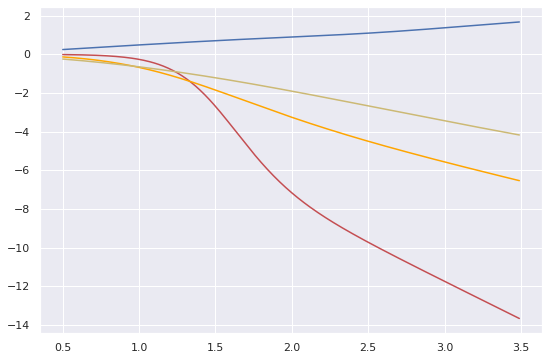

In [78]:
plt.figure(figsize=(9,6))
plt.plot(price_elasticity['Price Range'],price_elasticity['brand_1'],'r')
plt.plot(price_elasticity['Price Range'],price_elasticity['brand_2'],'orange')
plt.plot(price_elasticity['Price Range'],price_elasticity['brand_3'],'b')
plt.plot(price_elasticity['Price Range'],price_elasticity['brand_4'],'y')

# **own prices Elasticity Brand 5**

In [79]:
own_brand_5=pd.DataFrame(index=np.arange(price_range.size))
own_brand_5['price_1']=brand_choice['Price_1'].mean()
own_brand_5['price_2']=brand_choice['Price_2'].mean()
own_brand_5['price_3']=brand_choice['Price_3'].mean()
own_brand_5['price_4']=brand_choice['Price_4'].mean()
own_brand_5['price_5']=price_range
pred_brand_5=model.predict_proba(own_brand_5)
own_price_elasticity_brand_5=model_coef.iloc[4,4]*price_range*(1-pred_brand_5[:,4])
price_elasticity['brand_5']=own_price_elasticity_brand_5

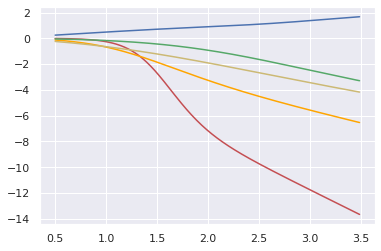

In [80]:
plt.plot(price_elasticity['Price Range'],price_elasticity['brand_1'],'r')
plt.plot(price_elasticity['Price Range'],price_elasticity['brand_2'],'orange')
plt.plot(price_elasticity['Price Range'],price_elasticity['brand_3'],'b')
plt.plot(price_elasticity['Price Range'],price_elasticity['brand_4'],'y')
plt.plot(price_elasticity['Price Range'],price_elasticity['brand_5'],'g')

# **Cross Price Elasticity Brand 5,cross Brand 4**

In [81]:
brand5_cross_brand4=pd.DataFrame(index=np.arange(price_range.size))
brand5_cross_brand4["price_1"]=brand_choice['Price_1'].mean()
brand5_cross_brand4["price_2"]=brand_choice['Price_2'].mean()
brand5_cross_brand4["price_3"]=brand_choice['Price_3'].mean()
brand5_cross_brand4["price_4"]=price_range
brand5_cross_brand4["price_5"]=brand_choice['Price_5'].mean()
pred_brand_4=model.predict_proba(brand5_cross_brand4)
own_price_elasticity_brand_5_cross_brand_4=model_coef.iloc[4,4]*price_range*(1-pred_brand_4[:,3])
price_elasticity['Brand_5_cross_brand_4']=own_price_elasticity_brand_5_cross_brand_4
price_elasticity

,Price Range,Mean PE,PE Few Oppur,PE Standard,PE well,PE Career,promotion,no_promotion,brand_1,brand_2,brand_3,brand_4,brand_5,Brand_5_cross_brand_4
0,0.50,-0.096406,-0.032274,-0.118694,-0.211150,-0.164929,-0.125728,-0.621278,-0.012698,-0.134252,0.247154,-0.243519,-0.048961,-0.212577
1,0.51,-0.100476,-0.034105,-0.122878,-0.217719,-0.169837,-0.129844,-0.632102,-0.013574,-0.139807,0.252041,-0.249949,-0.050518,-0.218190
2,0.52,-0.104672,-0.036026,-0.127156,-0.224397,-0.174820,-0.134039,-0.642847,-0.014506,-0.145525,0.256925,-0.256444,-0.052106,-0.223860
3,0.53,-0.108999,-0.038039,-0.131529,-0.231182,-0.179876,-0.138314,-0.653512,-0.015496,-0.151409,0.261805,-0.263005,-0.053723,-0.229587
4,0.54,-0.113459,-0.040150,-0.135999,-0.238077,-0.185006,-0.142670,-0.664096,-0.016547,-0.157465,0.266683,-0.269631,-0.055370,-0.235372
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,3.45,-8.016501,-12.418333,-5.722076,-5.051448,-4.157828,-4.861556,-0.292784,-13.509457,-6.457782,1.649992,-4.114040,-3.225325,-3.591311
296,3.46,-8.041758,-12.454911,-5.742328,-5.068303,-4.173153,-4.879758,-0.289522,-13.548645,-6.477179,1.656058,-4.128675,-3.241488,-3.604086
297,3.47,-8.066980,-12.491471,-5.762542,-5.085140,-4.188459,-4.897929,-0.286291,-13.587831,-6.496563,1.662115,-4.143293,-3.257618,-3.616847
298,3.48,-8.092169,-12.528014,-5.782719,-5.101959,-4.203748,-4.916070,-0.283090,-13.627016,-6.515934,1.668162,-4.157895,-3.273716,-3.629594


Text(0.5, 1.0, 'cross price elasticity of brand wrt to brand 4')

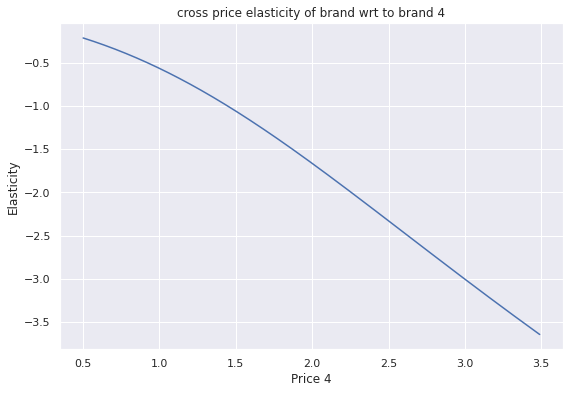

In [82]:
plt.figure(figsize=(9,6))
plt.plot(price_range,own_price_elasticity_brand_5_cross_brand_4)
plt.xlabel('Price 4')
plt.ylabel('Elasticity')
plt.title('cross price elasticity of brand wrt to brand 4')

In [83]:
brand1_cross_brand2=pd.DataFrame(index=np.arange(price_range.size))
brand1_cross_brand2["price_1"]=brand_choice['Price_1'].mean()
brand1_cross_brand2["price_2"]=price_range
brand1_cross_brand2["price_3"]=brand_choice['Price_3'].mean()
brand1_cross_brand2["price_4"]=brand_choice['Price_2'].mean()
brand1_cross_brand2["price_5"]=brand_choice['Price_5'].mean()
pred_brand_4=model.predict_proba(brand1_cross_brand2)
own_price_elasticity_brand_1_cross_brand_2=model_coef.iloc[1,1]*price_range*(1-pred_brand_4[:,0])
price_elasticity['Brand_1_cross_brand_2']=own_price_elasticity_brand_1_cross_brand_2
price_elasticity

,Price Range,Mean PE,PE Few Oppur,PE Standard,PE well,PE Career,promotion,no_promotion,brand_1,brand_2,brand_3,brand_4,brand_5,Brand_5_cross_brand_4,Brand_1_cross_brand_2
0,0.50,-0.096406,-0.032274,-0.118694,-0.211150,-0.164929,-0.125728,-0.621278,-0.012698,-0.134252,0.247154,-0.243519,-0.048961,-0.212577,-0.933566
1,0.51,-0.100476,-0.034105,-0.122878,-0.217719,-0.169837,-0.129844,-0.632102,-0.013574,-0.139807,0.252041,-0.249949,-0.050518,-0.218190,-0.952090
2,0.52,-0.104672,-0.036026,-0.127156,-0.224397,-0.174820,-0.134039,-0.642847,-0.014506,-0.145525,0.256925,-0.256444,-0.052106,-0.223860,-0.970605
3,0.53,-0.108999,-0.038039,-0.131529,-0.231182,-0.179876,-0.138314,-0.653512,-0.015496,-0.151409,0.261805,-0.263005,-0.053723,-0.229587,-0.989111
4,0.54,-0.113459,-0.040150,-0.135999,-0.238077,-0.185006,-0.142670,-0.664096,-0.016547,-0.157465,0.266683,-0.269631,-0.055370,-0.235372,-1.007607
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,3.45,-8.016501,-12.418333,-5.722076,-5.051448,-4.157828,-4.861556,-0.292784,-13.509457,-6.457782,1.649992,-4.114040,-3.225325,-3.591311,-5.678130
296,3.46,-8.041758,-12.454911,-5.742328,-5.068303,-4.173153,-4.879758,-0.289522,-13.548645,-6.477179,1.656058,-4.128675,-3.241488,-3.604086,-5.692228
297,3.47,-8.066980,-12.491471,-5.762542,-5.085140,-4.188459,-4.897929,-0.286291,-13.587831,-6.496563,1.662115,-4.143293,-3.257618,-3.616847,-5.706310
298,3.48,-8.092169,-12.528014,-5.782719,-5.101959,-4.203748,-4.916070,-0.283090,-13.627016,-6.515934,1.668162,-4.157895,-3.273716,-3.629594,-5.720377


Text(0.5, 1.0, 'cross price elasticity of brand wrt to brand 4')

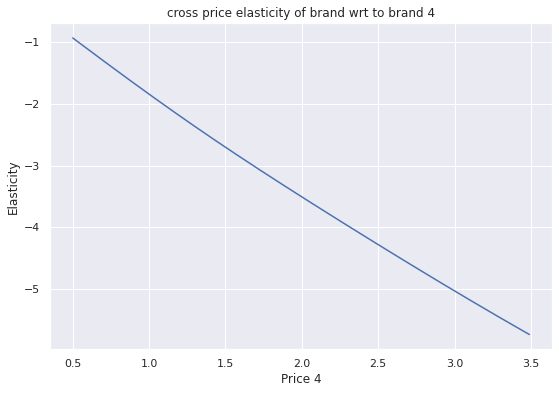

In [84]:
plt.figure(figsize=(9,6))
plt.plot(price_range,own_price_elasticity_brand_1_cross_brand_2)
plt.xlabel('Price 4')
plt.ylabel('Elasticity')
plt.title('cross price elasticity of brand wrt to brand 4')

# **Linear Regression**

In [85]:
purc_quant=purch[purch["Incidence"]==1]
purc_quant=pd.get_dummies(purc_quant,columns=['Brand'],prefix='Brand',prefix_sep='_')
purc_quant['Price_Incidence']=(purc_quant['Brand_1']*purc_quant["Price_1"]+
                              purc_quant['Brand_2']*purc_quant["Price_2"]+
                              purc_quant['Brand_3']*purc_quant["Price_3"]+
                              purc_quant['Brand_4']*purc_quant["Price_4"]+
                              purc_quant['Brand_5']*purc_quant["Price_5"])
purc_quant['Promotion_Incidence']=(purc_quant['Brand_1']*purc_quant["Promotion_1"]+
                              purc_quant['Brand_2']*purc_quant["Promotion_2"]+
                              purc_quant['Brand_3']*purc_quant["Promotion_3"]+
                              purc_quant['Brand_4']*purc_quant["Promotion_4"]+
                              purc_quant['Brand_5']*purc_quant["Promotion_5"])

In [86]:
x= purc_quant[['Price_Incidence','Promotion_Incidence']]
y=purc_quant["Quantity"]
model_quantity=LinearRegression()
model_quantity.fit(x,y)
model_quantity.coef_

array([-0.8173651 , -0.10504673])

In [87]:
price_elasticity_quantity=pd.DataFrame(index=np.arange(price_range.size))
price_elasticity_quantity['Price_Incidence']=price_range
# price elasticity of purchase quantity under two conditions: when the chosen brand is and is not on promotion
price_elasticity_quantity['Promotion_Incidence']=1
beta_quantity=model_quantity.coef_[0]
pred_quant=model_quantity.predict(price_elasticity_quantity) 
price_elasticity_quantity_promotion_yes= beta_quantity* price_range / pred_quant
price_elasticity["PE_Quantity_Promotion_1"]=price_elasticity_quantity_promotion_yes
price_elasticity

,Price Range,Mean PE,PE Few Oppur,PE Standard,PE well,PE Career,promotion,no_promotion,brand_1,brand_2,brand_3,brand_4,brand_5,Brand_5_cross_brand_4,Brand_1_cross_brand_2,PE_Quantity_Promotion_1
0,0.50,-0.096406,-0.032274,-0.118694,-0.211150,-0.164929,-0.125728,-0.621278,-0.012698,-0.134252,0.247154,-0.243519,-0.048961,-0.212577,-0.933566,-0.102157
1,0.51,-0.100476,-0.034105,-0.122878,-0.217719,-0.169837,-0.129844,-0.632102,-0.013574,-0.139807,0.252041,-0.249949,-0.050518,-0.218190,-0.952090,-0.104413
2,0.52,-0.104672,-0.036026,-0.127156,-0.224397,-0.174820,-0.134039,-0.642847,-0.014506,-0.145525,0.256925,-0.256444,-0.052106,-0.223860,-0.970605,-0.106679
3,0.53,-0.108999,-0.038039,-0.131529,-0.231182,-0.179876,-0.138314,-0.653512,-0.015496,-0.151409,0.261805,-0.263005,-0.053723,-0.229587,-0.989111,-0.108954
4,0.54,-0.113459,-0.040150,-0.135999,-0.238077,-0.185006,-0.142670,-0.664096,-0.016547,-0.157465,0.266683,-0.269631,-0.055370,-0.235372,-1.007607,-0.111238
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,3.45,-8.016501,-12.418333,-5.722076,-5.051448,-4.157828,-4.861556,-0.292784,-13.509457,-6.457782,1.649992,-4.114040,-3.225325,-3.591311,-5.678130,-1.774292
296,3.46,-8.041758,-12.454911,-5.742328,-5.068303,-4.173153,-4.879758,-0.289522,-13.548645,-6.477179,1.656058,-4.128675,-3.241488,-3.604086,-5.692228,-1.788634
297,3.47,-8.066980,-12.491471,-5.762542,-5.085140,-4.188459,-4.897929,-0.286291,-13.587831,-6.496563,1.662115,-4.143293,-3.257618,-3.616847,-5.706310,-1.803124
298,3.48,-8.092169,-12.528014,-5.782719,-5.101959,-4.203748,-4.916070,-0.283090,-13.627016,-6.515934,1.668162,-4.157895,-3.273716,-3.629594,-5.720377,-1.817766


Text(0.5, 1.0, 'Price Elasticity of Purchase Quantity with promotion')

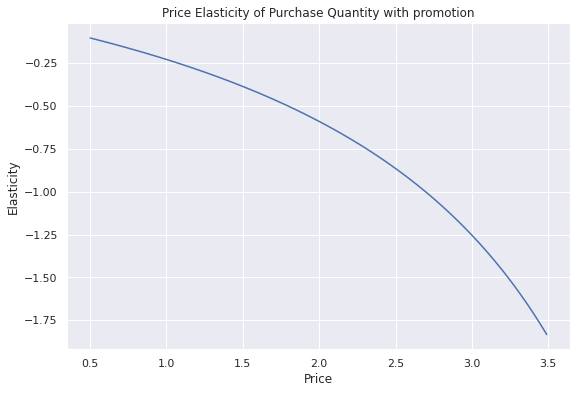

In [88]:
plt.figure(figsize=(9,6))
plt.plot(price_range,price_elasticity_quantity_promotion_yes)
plt.xlabel('Price')
plt.ylabel('Elasticity')
plt.title('Price Elasticity of Purchase Quantity with promotion')